Decision Tree

In [ ]:
import numpy as np # Linear Algebra/array manupulation
import pandas as pd # Data processing/ Data cleaning

In [ ]:
Customers=pd.read_csv('/customer_churn_dataset.csv')

In [ ]:
Customers.head()

,customer_id,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn_status,call_duration_minutes,latitude,longitude
0,3850,Male,42,Married,3,Monthly,Fiber Optic,No,No,Yes,...,No,Yes,Yes,Yes,41.40,595.21,No,1062,-49.780269,-13.803970
1,4696,Female,76,Single,1,Yearly,DSL,No,Yes,Yes,...,No,Yes,Yes,No,46.20,940.05,No,901,56.553157,113.992914
2,5695,Female,39,Married,2,Monthly,Fiber Optic,Yes,No,Yes,...,No,No,Yes,No,43.05,919.62,No,928,80.762088,-27.906437
3,8712,Female,74,Single,3,Monthly,DSL,No,No,No,...,Yes,No,No,Yes,23.01,538.68,Yes,479,87.832819,86.922690
4,10506,Male,30,Married,3,Yearly,DSL,No,Yes,No,...,Yes,No,No,No,38.19,875.93,No,650,-88.373695,-29.320198


In [ ]:
Customers.describe()

,customer_id,age,dependents,monthly_charges,total_charges,call_duration_minutes,latitude,longitude
count,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,519770.864000,48.442000,1.5440,51.535580,523.183180,596.786000,0.915006,0.081410
std,288105.287058,17.458185,1.1343,29.383052,296.521689,336.445591,51.909861,100.505525
min,3850.000000,18.000000,0.0000,0.140000,2.570000,3.000000,-88.373695,-178.645120
25%,266212.000000,33.000000,1.0000,25.990000,277.372500,317.750000,-42.374942,-85.098356
50%,532085.000000,49.000000,2.0000,51.665000,543.750000,613.000000,-0.745630,2.257802
75%,769655.500000,63.000000,3.0000,77.942500,783.802500,864.250000,46.173488,84.043319
max,997121.000000,77.000000,3.0000,99.660000,999.570000,1198.000000,89.999598,178.067051


In [ ]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            500 non-null    int64  
 1   gender                 500 non-null    object 
 2   age                    500 non-null    int64  
 3   marital_status         500 non-null    object 
 4   dependents             500 non-null    int64  
 5   contract_type          500 non-null    object 
 6   internet_service       500 non-null    object 
 7   phone_service          500 non-null    object 
 8   multiple_lines         500 non-null    object 
 9   online_security        500 non-null    object 
 10  online_backup          500 non-null    object 
 11  device_protection      500 non-null    object 
 12  tech_support           500 non-null    object 
 13  streaming_tv           500 non-null    object 
 14  streaming_movies       500 non-null    object 
 15  monthl

In [ ]:
print(Customers.columns)

Index(['customer_id', 'gender', 'age', 'marital_status', 'dependents',
       'contract_type', 'internet_service', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'monthly_charges', 'total_charges',
       'churn_status', 'call_duration_minutes', 'latitude', 'longitude'],
      dtype='object')


In [ ]:
Customers=Customers.drop(['customer_id'],axis=1)

In [ ]:
Customers

,age,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn_status,call_duration_minutes,...,contract_type_Monthly,contract_type_Yearly,internet_service_DSL,internet_service_Fiber Optic,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_Yes,online_security_No,online_security_Yes
0,42,No,No,Yes,Yes,Yes,41.40,595.21,No,1062,...,True,False,False,True,True,False,True,False,False,True
1,76,No,No,Yes,Yes,No,46.20,940.05,No,901,...,False,True,True,False,True,False,False,True,False,True
2,39,Yes,No,No,Yes,No,43.05,919.62,No,928,...,True,False,False,True,False,True,True,False,False,True
3,74,Yes,Yes,No,No,Yes,23.01,538.68,Yes,479,...,True,False,True,False,True,False,True,False,True,False
4,30,No,Yes,No,No,No,38.19,875.93,No,650,...,False,True,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,76,No,Yes,No,Yes,No,58.12,139.76,No,428,...,False,True,False,True,False,True,False,True,False,True
496,76,No,Yes,Yes,Yes,No,81.67,434.50,No,370,...,True,False,False,True,False,True,False,True,False,True
497,24,No,Yes,Yes,Yes,Yes,93.68,928.09,No,439,...,False,True,True,False,True,False,True,False,False,True
498,43,No,No,Yes,Yes,No,85.05,998.00,No,238,...,False,True,False,True,False,True,False,True,True,False


In [ ]:
# Encoding Categorical Variables into Numerical Variables
Customers_data = pd.get_dummies(Customers[['online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'churn_status']],drop_first=True)

In [ ]:
Customers_data

,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,churn_status_Yes
0,False,False,True,True,True,False
1,False,False,True,True,False,False
2,True,False,False,True,False,False
3,True,True,False,False,True,True
4,False,True,False,False,False,False
...,...,...,...,...,...,...
495,False,True,False,True,False,False
496,False,True,True,True,False,False
497,False,True,True,True,True,False
498,False,False,True,True,False,False


In [ ]:
# Convert True/False values to 1s and 0s
Customers_data = Customers_data.astype(int)

In [ ]:
Customers_data

,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,churn_status_Yes
0,0,0,1,1,1,0
1,0,0,1,1,0,0
2,1,0,0,1,0,0
3,1,1,0,0,1,1
4,0,1,0,0,0,0
...,...,...,...,...,...,...
495,0,1,0,1,0,0
496,0,1,1,1,0,0
497,0,1,1,1,1,0
498,0,0,1,1,0,0


In [ ]:
Customers=pd.concat([Customers,Customers_data],axis=1)

In [ ]:
Customers

,age,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn_status,call_duration_minutes,...,multiple_lines_No,multiple_lines_Yes,online_security_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,churn_status_Yes
0,42,No,No,Yes,Yes,Yes,41.40,595.21,No,1062,...,True,False,False,True,0,0,1,1,1,0
1,76,No,No,Yes,Yes,No,46.20,940.05,No,901,...,False,True,False,True,0,0,1,1,0,0
2,39,Yes,No,No,Yes,No,43.05,919.62,No,928,...,True,False,False,True,1,0,0,1,0,0
3,74,Yes,Yes,No,No,Yes,23.01,538.68,Yes,479,...,True,False,True,False,1,1,0,0,1,1
4,30,No,Yes,No,No,No,38.19,875.93,No,650,...,False,True,True,False,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,76,No,Yes,No,Yes,No,58.12,139.76,No,428,...,False,True,False,True,0,1,0,1,0,0
496,76,No,Yes,Yes,Yes,No,81.67,434.50,No,370,...,False,True,False,True,0,1,1,1,0,0
497,24,No,Yes,Yes,Yes,Yes,93.68,928.09,No,439,...,True,False,False,True,0,1,1,1,1,0
498,43,No,No,Yes,Yes,No,85.05,998.00,No,238,...,False,True,True,False,0,0,1,1,0,0


In [ ]:
print(Customers.columns)

Index(['age', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'monthly_charges', 'total_charges',
       'churn_status', 'call_duration_minutes', 'latitude', 'longitude',
       'gender_Male', 'marital_status_Single', 'contract_type_Yearly',
       'internet_service_Fiber Optic', 'phone_service_Yes',
       'multiple_lines_Yes', 'online_security_Yes', 'online_backup_Yes',
       'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes',
       'streaming_movies_Yes', 'churn_status_Yes', 'dependents',
       'gender_Female', 'gender_Male', 'marital_status_Married',
       'marital_status_Single', 'contract_type_Monthly',
       'contract_type_Yearly', 'internet_service_DSL',
       'internet_service_Fiber Optic', 'phone_service_No', 'phone_service_Yes',
       'multiple_lines_No', 'multiple_lines_Yes', 'online_security_No',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'stream

In [ ]:
# Select only the categorical columns
categorical_columns = ['age', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'monthly_charges', 'total_charges',
       'churn_status', 'call_duration_minutes', 'latitude', 'longitude',
       'gender_Male', 'marital_status_Single', 'contract_type_Yearly',
       'internet_service_Fiber Optic', 'phone_service_Yes',
       'multiple_lines_Yes', 'online_security_Yes', 'online_backup_Yes',
       'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes',
       'streaming_movies_Yes', 'churn_status_Yes', 'dependents',
       'gender_Female', 'gender_Male', 'marital_status_Married',
       'marital_status_Single', 'contract_type_Monthly',
       'contract_type_Yearly', 'internet_service_DSL',
       'internet_service_Fiber Optic', 'phone_service_No', 'phone_service_Yes',
       'multiple_lines_No', 'multiple_lines_Yes', 'online_security_No',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes',
       'churn_status_Yes']

# Apply one-hot encoding
Customers_encoded = pd.get_dummies(Customers, columns=categorical_columns, drop_first=True)

print(Customers_encoded.head())

   age_19  age_20  age_21  age_22  age_23  age_24  age_25  age_26  age_27  \
0   False   False   False   False   False   False   False   False   False   
1   False   False   False   False   False   False   False   False   False   
2   False   False   False   False   False   False   False   False   False   
3   False   False   False   False   False   False   False   False   False   
4   False   False   False   False   False   False   False   False   False   

   age_28  ...  device_protection_Yes_1  device_protection_Yes_1  \
0   False  ...                    False                    False   
1   False  ...                    False                    False   
2   False  ...                    False                    False   
3   False  ...                     True                     True   
4   False  ...                     True                     True   

   tech_support_Yes_1  tech_support_Yes_1  streaming_tv_Yes_1  \
0                True                True                True  

In [ ]:
# Convert True/False values to 1s and 0s
Customers_data = Customers_data.astype(int)

Implement Decision Tree

In [ ]:
x = Customers.drop(columns=['churn_status'])
y = Customers['churn_status']

In [ ]:
x

,age,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,call_duration_minutes,latitude,...,multiple_lines_No,multiple_lines_Yes,online_security_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,churn_status_Yes
0,42,No,No,Yes,Yes,Yes,41.40,595.21,1062,-49.780269,...,True,False,False,True,0,0,1,1,1,0
1,76,No,No,Yes,Yes,No,46.20,940.05,901,56.553157,...,False,True,False,True,0,0,1,1,0,0
2,39,Yes,No,No,Yes,No,43.05,919.62,928,80.762088,...,True,False,False,True,1,0,0,1,0,0
3,74,Yes,Yes,No,No,Yes,23.01,538.68,479,87.832819,...,True,False,True,False,1,1,0,0,1,1
4,30,No,Yes,No,No,No,38.19,875.93,650,-88.373695,...,False,True,True,False,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,76,No,Yes,No,Yes,No,58.12,139.76,428,75.487045,...,False,True,False,True,0,1,0,1,0,0
496,76,No,Yes,Yes,Yes,No,81.67,434.50,370,-22.238678,...,False,True,False,True,0,1,1,1,0,0
497,24,No,Yes,Yes,Yes,Yes,93.68,928.09,439,-28.324261,...,True,False,False,True,0,1,1,1,1,0
498,43,No,No,Yes,Yes,No,85.05,998.00,238,31.974046,...,False,True,True,False,0,0,1,1,0,0


In [ ]:
y

0       No
1       No
2       No
3      Yes
4       No
      ... 
495     No
496     No
497     No
498     No
499     No
Name: churn_status, Length: 500, dtype: object

Split the available data into TEST and TRAIN

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Convert all string values to numerical values in the input features
x_train = x_train.apply(pd.to_numeric, errors='coerce').fillna(0)
x_test = x_test.apply(pd.to_numeric, errors='coerce').fillna(0)

Model-1

In [ ]:
# Fit the decision tree classifier
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

Model-2

In [ ]:
dt2=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt2.fit(x_train,y_train)
y_pred2=dt2.predict(x_test)

Model-3

In [ ]:
dt3=tree.DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_leaf=2)
dt3.fit(x_train,y_train)
y_pred3=dt3.predict(x_test)

In [ ]:
from sklearn import metrics
print('Accuracy M1:',metrics.accuracy_score(y_test,y_pred))
print('Accuracy M2:',metrics.accuracy_score(y_test,y_pred2))
print('Accuracy M3:',metrics.accuracy_score(y_test,y_pred3))

Accuracy M1: 1.0
Accuracy M2: 1.0
Accuracy M3: 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

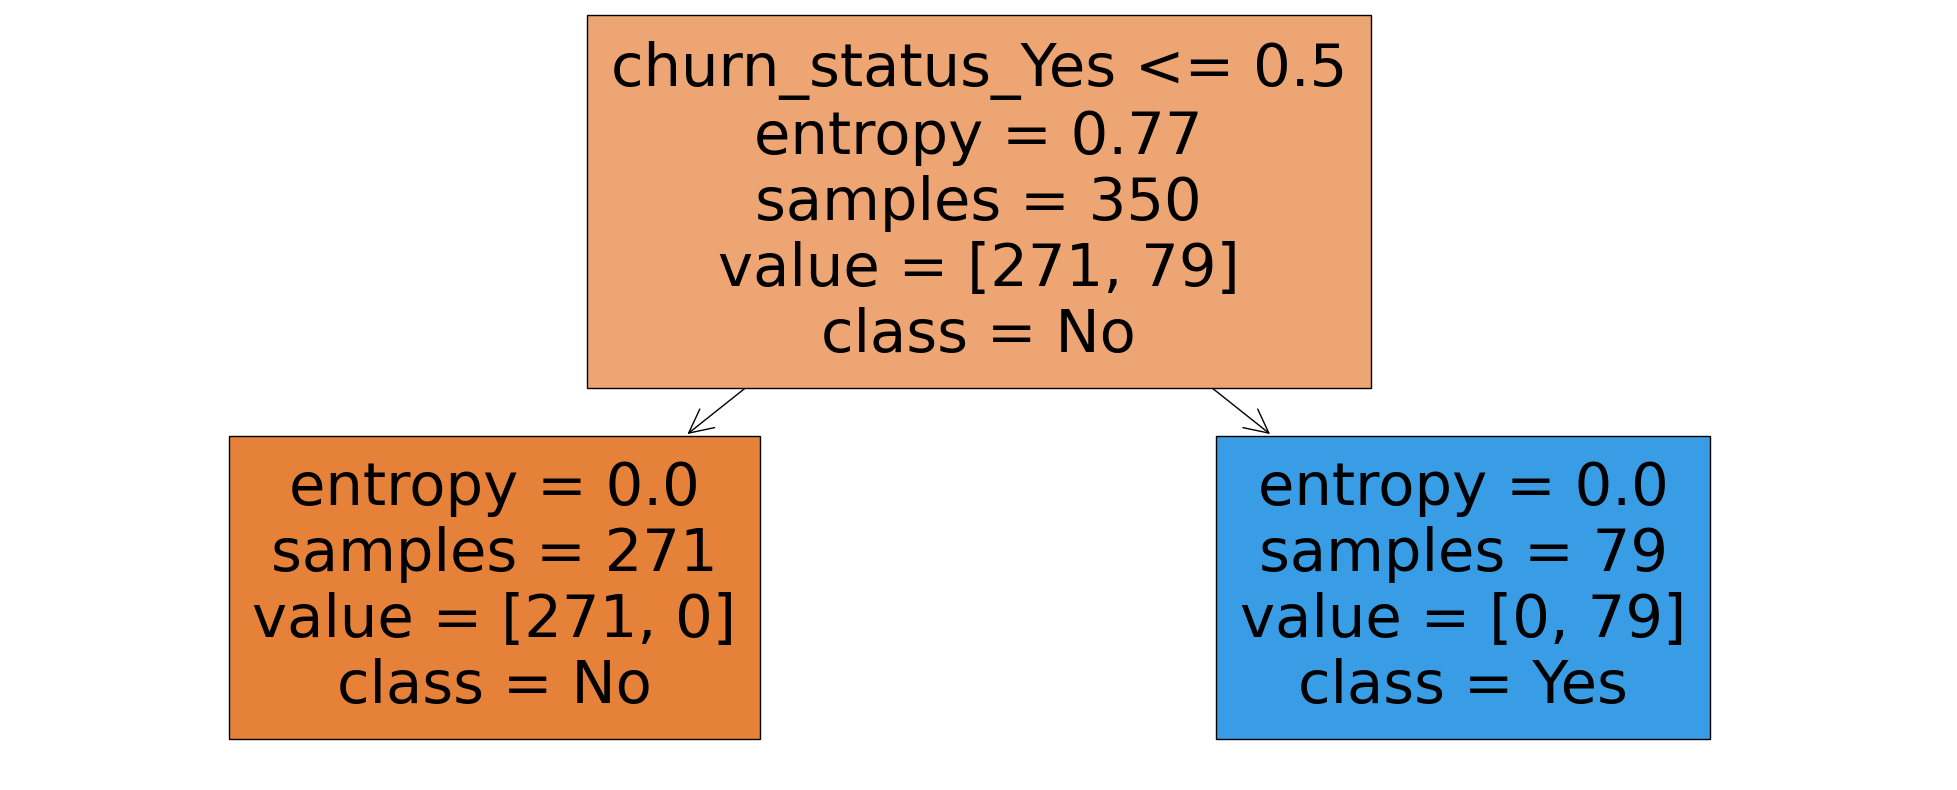

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plot_tree(dt3,class_names=['No','Yes'],feature_names=x.columns,filled=True)
plt.show